# Medical Diagnosis with Random Forest Classifier
Build a machine learning model to predict whether the patients have diabetes or not.

Medical diagnosis is a very essential and critical aspect for healthcare professionals. In particular, classification of diabetics is very complex. An early identification of diabetes is much important in controlling diabetes. A patient has to go through several tests and later it is very difficult for the professionals to keep track of multiple factors at the time of diagnosis process which can lead to inaccurate results which makes the detection very challenging. Due to most advance technologies especially machine learning algorithms are very beneficial for the fast and accurate prediction of the disease in the healthcare industries.

## Dataset
### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

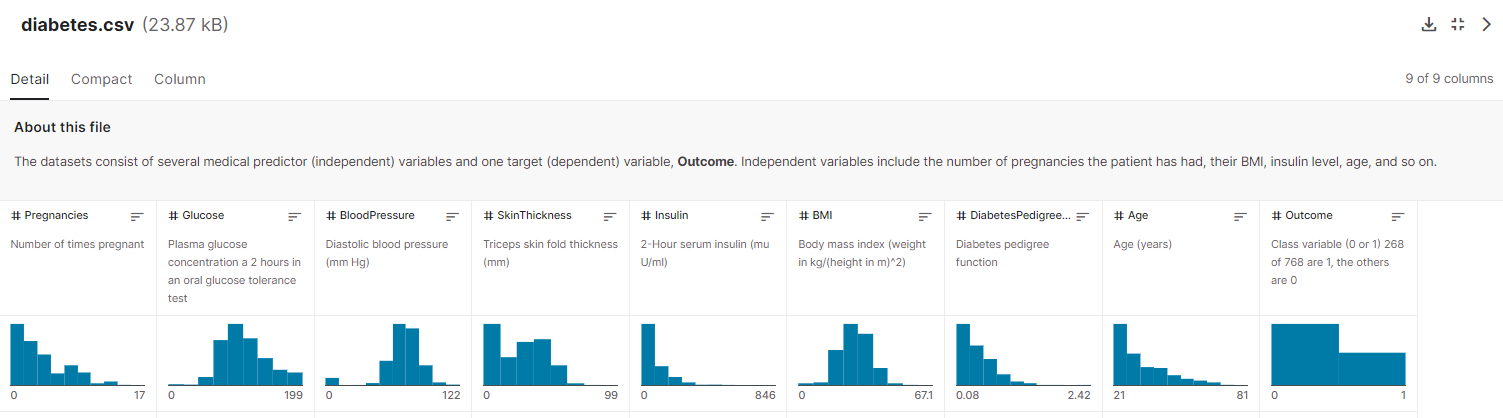

## What is random forest ?

Random forest algorithms have three main hyperparameters, which need to be set before training. These include node size, the number of trees, and the number of features sampled. From there, the random forest classifier can be used to solve for regression or classification problems.

The random forest algorithm is made up of a collection of decision trees, and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample. Of that training sample, one-third of it is set aside as test data, known as the out-of-bag (oob) sample, which we’ll come back to later. Another instance of randomness is then injected through feature bagging, adding more diversity to the dataset and reducing the correlation among decision trees. Depending on the type of problem, the determination of the prediction will vary. For a regression task, the individual decision trees will be averaged, and for a classification task, a majority vote—i.e. the most frequent categorical variable—will yield the predicted class. Finally, the oob sample is then used for cross-validation, finalizing that prediction.

# Libraries

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Preprocessing Data for Random Forests

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#In this case 0 values are not valid. They need to be propagated further on.
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
# Making a list of columns with total number of invalid values.
print('Column'+ '\t\t\t\t Total invalid Values'+'\t\t\t\t % of invalid values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total invalid Values				 % of invalid values
Pregnancies                                       0                              0.00
Glucose                                           5                              0.65
BloodPressure                                     35                             4.56
SkinThickness                                     227                            29.56
Insulin                                           374                            48.70
BMI                                               11                             1.43
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [6]:
#filling the invalid values with dataset mean values
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

In [7]:
# Making a list of columns with total number of invalid values. There should now be none left.
print('Column'+ '\t\t\t\t Total invalid Values'+'\t\t\t\t % of invalid values')
for i in df.columns:
    print(f"{i: <50}{df[i].isnull().sum():<30}{((df[i].isnull().sum())*100)/df.shape[0]: .2f}")

Column				 Total invalid Values				 % of invalid values
Pregnancies                                       0                              0.00
Glucose                                           0                              0.00
BloodPressure                                     0                              0.00
SkinThickness                                     0                              0.00
Insulin                                           0                              0.00
BMI                                               0                              0.00
DiabetesPedigreeFunction                          0                              0.00
Age                                               0                              0.00
Outcome                                           0                              0.00


In [8]:
#defining the predictors and target variables
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

## Fitting and Evaluating the Model

In [10]:
from sklearn.ensemble import RandomForestClassifier
#create an instance of the Random Forest model with default parameter values
rf = RandomForestClassifier()
#fit the model to our training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [11]:
#find out whether model is making accurate predictions
y_pred=rf.predict(X_test)

In [12]:
#quick way to assess, is by checking the accuracy
#check the predictions against the actual values in the test set and count up how many the model got right
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7857142857142857


# Visualizing the Results

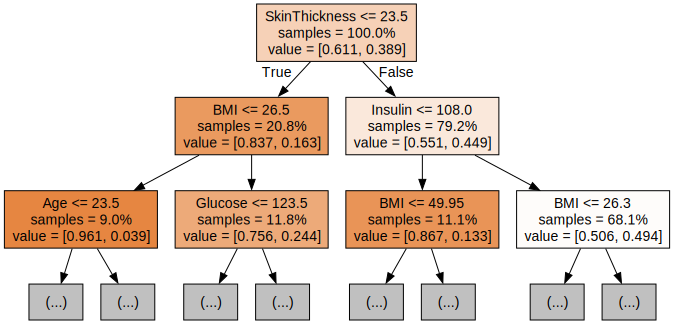

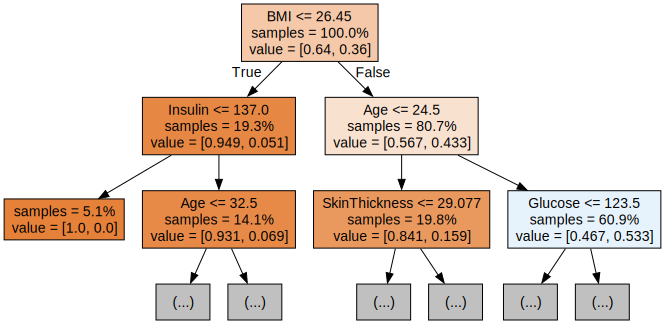

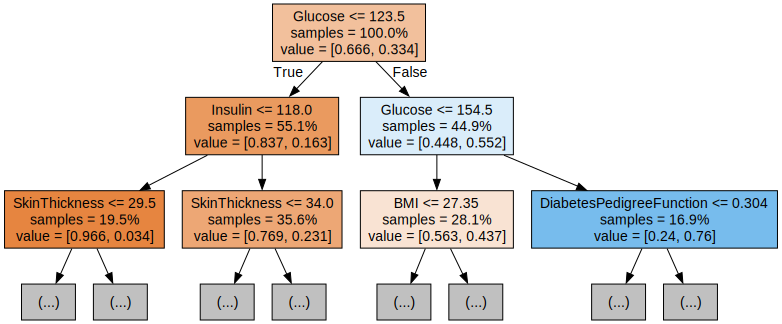

In [13]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


In [14]:
from sklearn.metrics import classification_report
target_names = ['Diabetes', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.83      0.87      0.85       107
      Normal       0.67      0.60      0.63        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



# Hyperparameter Tuning

The code below uses Scikit-Learn’s RandomizedSearchCV, which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:

- n_estimators: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
- max_depth: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013E9B9FC6A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000013E9B8B31C0>})

RandomizedSearchCV will train many models (defined by n_iter_ and save each one as variables, the code below creates a variable for the best model and prints the hyperparameters. In this case, we haven’t passed a scoring system to the function, so it defaults to accuracy. This function also uses cross validation, which means it splits the data into five equal-sized groups and uses 4 to train and 1 to test the result. It will loop through each group and give an accuracy score, which is averaged to find the best model.

In [16]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 462}


In [17]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    Diabetes       0.86      0.89      0.87       107
      Normal       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154



# More Evaluation Metrics

Let’s look at the confusion matrix. This plots what the model predicted against what the correct prediction was. We can use this to understand the tradeoff between false positives (top right) and false negatives(bottom left) We can plot the confusion matrix using this code:

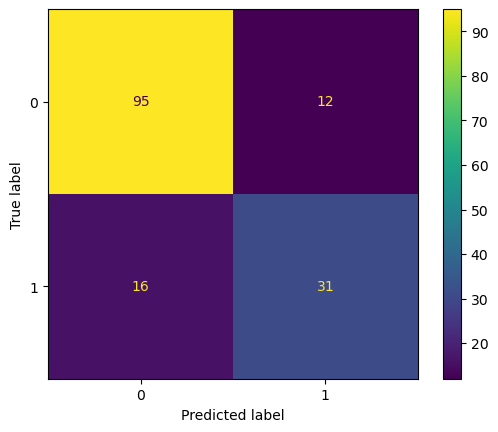

In [18]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [19]:
y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8181818181818182
Precision: 0.7209302325581395
Recall: 0.6595744680851063


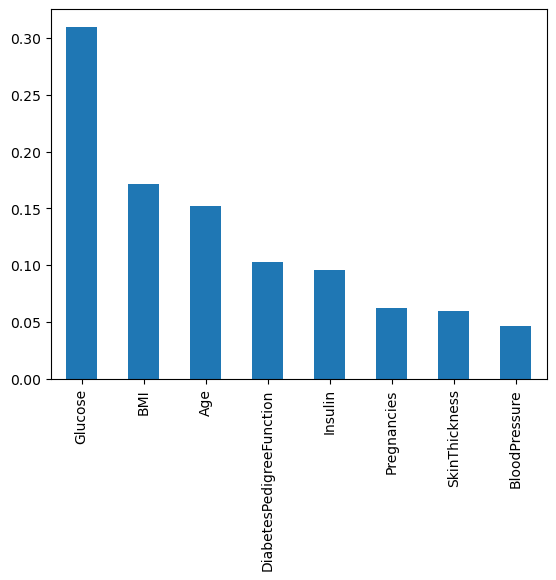

In [20]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

references:

- https://www.datacamp.com/tutorial/random-forests-classifier-python